In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import matplotlib.pyplot as plt
import PIL
import warnings
from glob import glob
from IPython.display import display, Image
import io
import pydotplus
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier


%matplotlib inline

In [2]:
data = pd.read_csv(r"C:\Users\Nahid\Desktop\CSE475\dataset.csv")

In [3]:
data.head(2)

,time,gender,sexuallity,age,income,race,bodyweight,virgin,prostitution_legal,pay_for_sex,friends,social_fear,depressed,what_help_from_others,attempt_suicide,employment,edu_level,improve_yourself_how
0,5/17/2016 20:04,Male,Straight,35,"$30,000 to $39,999",White non-Hispanic,Normal weight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date",Yes,Employed for wages,Associate degree,None
1,5/17/2016 20:04,Male,Bisexual,21,"$1 to $10,000",White non-Hispanic,Underweight,Yes,No,No,0.0,Yes,Yes,"wingman/wingwoman, Set me up with a date, date...",No,Out of work and looking for work,"Some college, no degree",join clubs/socual clubs/meet ups


In [5]:
features = data.columns
features

Index(['time', 'gender', 'sexuallity', 'age', 'income', 'race', 'bodyweight',
       'virgin', 'prostitution_legal', 'pay_for_sex', 'friends', 'social_fear',
       'depressed', 'what_help_from_others', 'attempt_suicide', 'employment',
       'edu_level', 'improve_yourself_how'],
      dtype='object')

In [6]:
def convert_string(txt):
    if 'Yes' in txt:
        return 1
    else:
        return 0

In [8]:
data.Quality = data.attempt_suicide.apply(convert_string)

In [9]:
features = [x for x in features if x != 'attempt_suicide']
features

['time',
 'gender',
 'sexuallity',
 'age',
 'income',
 'race',
 'bodyweight',
 'virgin',
 'prostitution_legal',
 'pay_for_sex',
 'friends',
 'social_fear',
 'depressed',
 'what_help_from_others',
 'employment',
 'edu_level',
 'improve_yourself_how']

In [10]:
train, test = train_test_split(data, test_size = 0.09)
print(len(data))
print(len(train))
print(len(test))

469
426
43


In [11]:
RF = RandomForestClassifier(n_estimators=5, max_depth=2,
                             random_state=0)


In [12]:
x_train = train[features]
y_train = train["attempt_suicide"]

x_test = test[features]
y_test = test["attempt_suicide"]

In [13]:
from sklearn import preprocessing
import sys
le = preprocessing.LabelEncoder()
x_train = x_train.copy()
x_test = x_test.copy()
for col in features:
    if col!= 'age' and col!= 'friends':
        x_train.loc[:,col] = le.fit_transform(x_train[col])
        x_test.loc[:,col] = le.fit_transform(x_test[col])
    
RF = RF.fit(x_train, y_train)

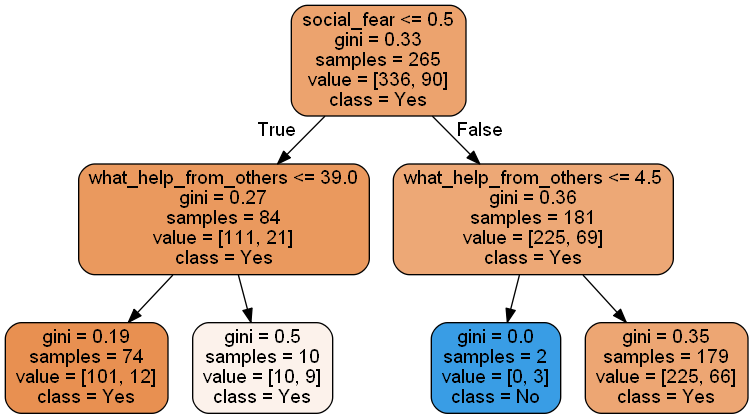

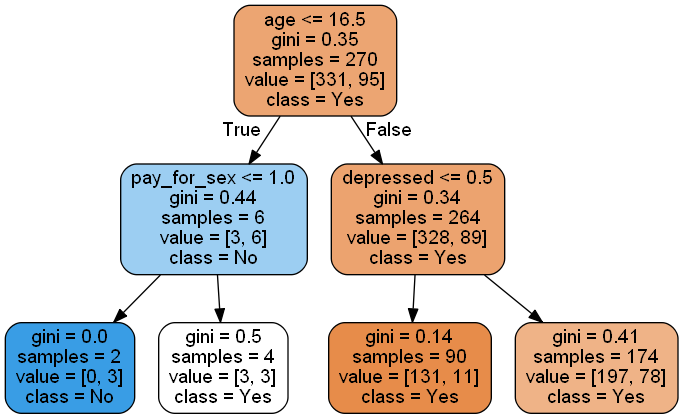

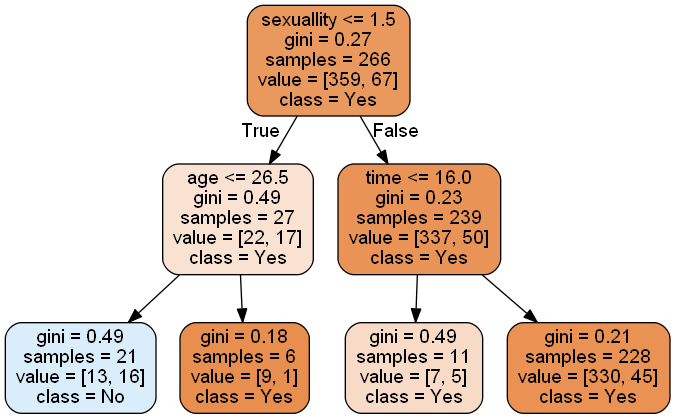

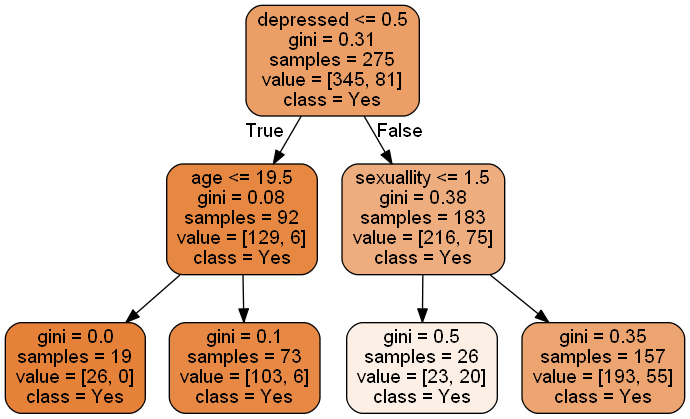

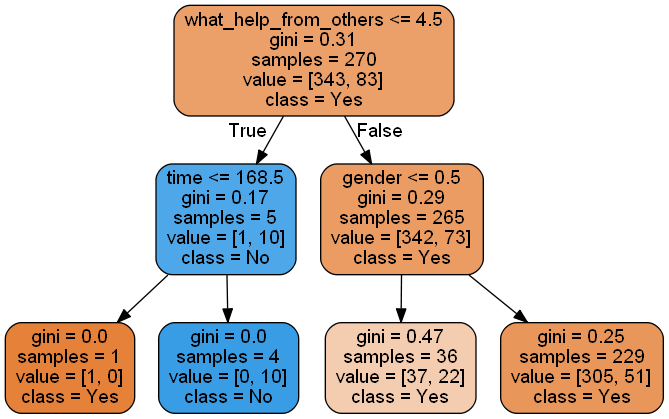

In [14]:
def save_decision_trees_as_png(clf, iteration, feature_name, target_name):
    file_name = "tree" + str(iteration) + ".png"
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    
estimator = RF.estimators_[2]    
feature_names = features
target_names = data.attempt_suicide
for i in range(len(RF.estimators_)):
    save_decision_trees_as_png(RF.estimators_[i], i, feature_names, target_names)
    
images = [ PIL.Image.open(f) for f in glob('./*.png') ]
for im in images:
    display(Image(filename=im.filename, retina=True))

In [15]:
y_pred = RF.predict(x_test)

In [16]:
y_pred

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No'],
      dtype=object)

In [17]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest Classifier: ", round(score, 1), "%" )

Accuracy using Random Forest Classifier:  93.0 %
